<a href="https://colab.research.google.com/github/Location-Artistry/ColabNotebooks/blob/master/Stock_Tech_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Technical Analysis MACD with Python-yfinance-mplfinance
## Notebook Configuration


In [2]:
# Working Colab to explore MACD signals
!pip install yfinance
!pip install mplfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf
from datetime import date 
plt.style.use('fivethirtyeight')

     |████████████████████████████████| 5.5MB 11.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=0971b49336360a974e0ae962586f6f70629cba68c965bfdc85b4f1b722eb388f
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 61kB 4.1MB/s 


#Functions Definitions

In [3]:
# functiom definitions
def getStock(endDate, sym='MRNA', startDate='01-01-2020'):
  stockData = yf.Ticker(sym)
  df = stockData.history(period='ytd')
  df = df.reset_index()
  df = df[(df['Date'] >= startDate) & (df['Date'] <= endDate)]
  df = df.set_index('Date')
  return df

def plotClose(sym, df, fig):
  plt.figure(figsize=fig)
  plt.plot(df['Close'], label='Close')
  plt.title(f'{sym} Closing Price')
  plt.xlabel('Dates')
  plt.ylabel('Price in Dollars($)')
  plt.xticks(rotation=45)

def plotMACD(sym, df, fig):
  sSpan,lSpan,mSpan = 12,26,9
  shortMACD = df.Close.ewm(span=sSpan,adjust=False).mean()
  longMACD = df.Close.ewm(span=lSpan,adjust=False).mean()
  MACD = shortMACD - longMACD
  sigLine = MACD.ewm(span=mSpan,adjust=False).mean()
  histogram = MACD - sigLine
  # Plot the MACD & Signal Lines
  plt.figure(figsize=fig)
  plt.plot(df.index,MACD,label=('MACD Line'),color='red')
  plt.plot(df.index,sigLine,label=('Signal Line'),color='blue')
  plt.bar(histogram.index, histogram, color='green')
  plt.title(f'{sym} Closing Price')
  plt.legend(loc='upper left')
  plt.xticks(rotation=45)

# function that creates mpf MACD finance chart from ticker dataFrame
def mpfMACD(sym,df,figSze):
  sSpan,lSpan,mSpan = 12,26,9
  shortMACD = df.Close.ewm(span=sSpan,adjust=False).mean()
  longMACD = df.Close.ewm(span=lSpan,adjust=False).mean()
  MACD = shortMACD - longMACD
  sigLine = MACD.ewm(span=mSpan,adjust=False).mean()
  histogram = MACD - sigLine
  # Plot the MACD & Signal Lines
  MACDplot = mpf.make_addplot(MACD, type='line', color='red')
  sigPlot = mpf.make_addplot(sigLine, type='line', color='blue')
  histPlot = mpf.make_addplot(histogram, type='bar', color='green')
  mpf.figure(figsize=figSze)
  mpf.plot(df,type='line',addplot=[MACDplot, sigPlot, histPlot], no_xgaps = True,figscale=1.5)


# Matplotlib Working Section

In [ ]:
sym, startDate, endDate = 'TSLA','09-01-2020','11-26-2020'
df = getStock(sym,startDate,endDate)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-09-01,502.140015,502.489990,470.510010,475.049988,90119400,0,0.0
2020-09-02,478.989990,479.040009,405.119995,447.369995,96176100,0,0.0
2020-09-03,407.230011,431.799988,402.000000,407.000000,87596100,0,0.0
2020-09-04,402.809998,428.000000,372.019989,418.320007,110321900,0,0.0
2020-09-08,356.000000,368.739990,329.880005,330.209991,115465700,0,0.0


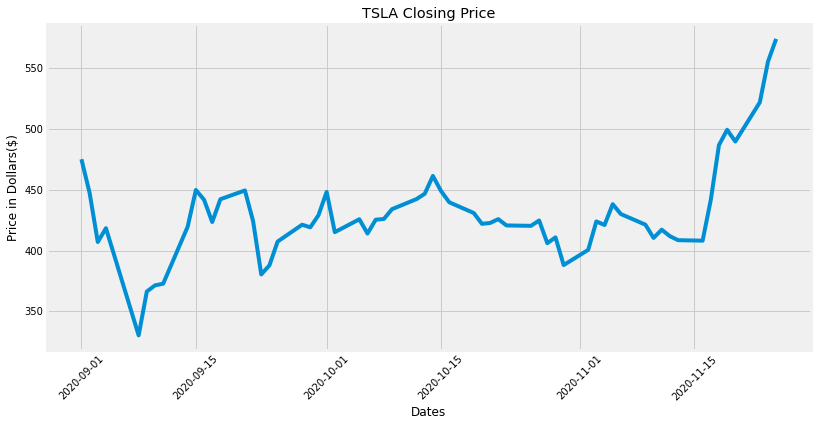

In [ ]:
figSize = [12.2,6]
plotClose(sym, df, figSize)

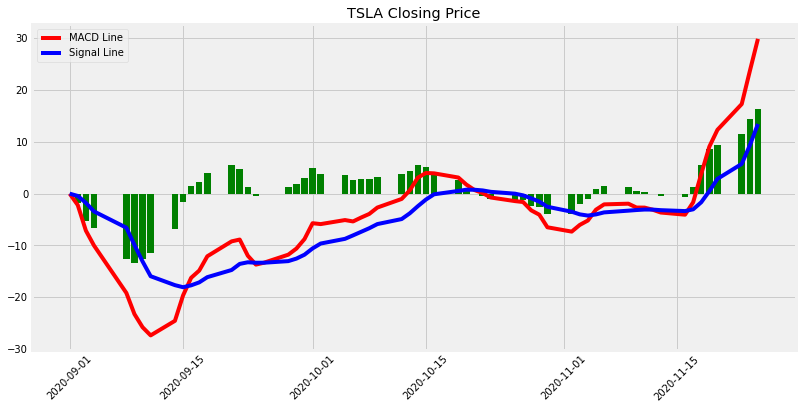

In [ ]:
plotMACD(sym,df,figSize)

#mplfinance Library Exploration

In [ ]:
# this is kind of awesome, instant candlestick charts!
mpf.plot(df, type='candle', no_xgaps = True, mav=(12,26,50))

In [ ]:
styles = ['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
I 'classic',
 'default',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

print(styles[0])

binance


Enter stock ticker symbol: 
Starting Date in mm-dd-yyyy format: 


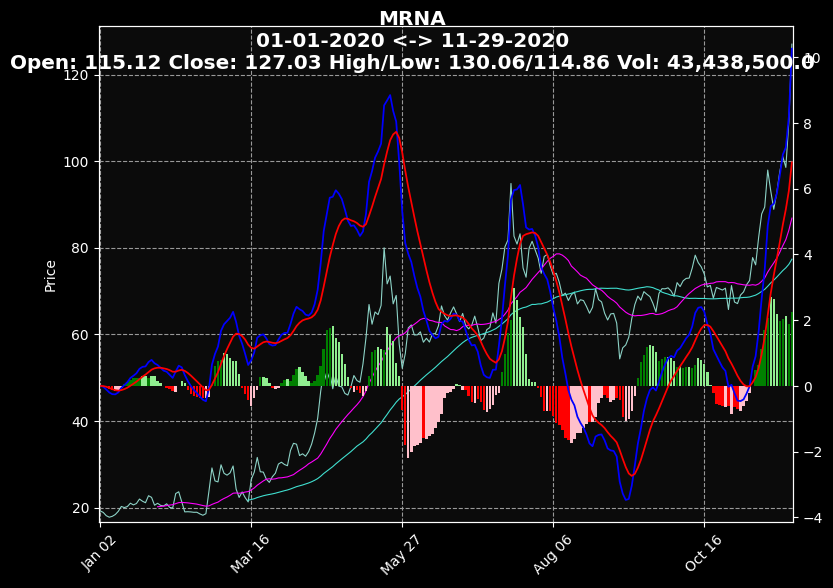

In [31]:
def mpfMACD():
  def histPos(val):
    if val > 0:    
      return val
    else:
      return 0  
  def histNeg(val):
    if val < 0:
      return val
    else:
      return 0
  sym = input(f'Enter stock ticker symbol: ').upper() or 'MRNA'
  startDate = input(f'Starting Date in mm-dd-yyyy format: ') or '01-01-2020'
  dt = date.today()
  today = (f'{dt.month}-{dt.day}-{dt.year}')
  df = getStock(today,sym,startDate)
  mc = mpf.make_marketcolors(up='g',down='r')
  s = mpf.make_mpf_style(marketcolors=mc)
  sSpan,lSpan,mSpan = 12,26,9
  shortMACD = df.Close.ewm(span=sSpan,adjust=False).mean()
  longMACD = df.Close.ewm(span=lSpan,adjust=False).mean()
  MACD = shortMACD - longMACD
  sigLine = MACD.ewm(span=mSpan,adjust=False).mean()
  histogram = MACD - sigLine

  #working to make histogram bars lighter or darker if > yesterday's value
  histPlus = histogram.apply(histPos)
  histNeg = histogram.apply(histNeg)
  histPdf = pd.DataFrame(histPlus)
  histNdf = pd.DataFrame(histNeg)
  posSh = histPdf.shift(1,axis=0)
  negSh = histNdf.shift(1,axis=0)
  histPdf['prev'] = posSh['Close']
  histNdf['prev'] = negSh['Close']
  #added previous days values to the pos and neg historgrams
  histPdf['greater'] = histPdf.apply(lambda row: row.prev if row.Close > row.prev else 0, axis=1)
  histPdf['less'] = histPdf.apply(lambda row: row.prev if row.Close < row.prev else 0, axis=1)
  histNdf['greater'] = histNdf.apply(lambda row: row.prev if row.Close < row.prev else 0, axis=1)
  histNdf['less'] = histNdf.apply(lambda row: row.prev if row.Close > row.prev else 0, axis=1)


  # Plot the MACD & Signal Lines & histogram
  MACDplot = mpf.make_addplot(MACD, type='line', color='blue')
  sigPlot = mpf.make_addplot(sigLine, type='line', color='red')
  histPosBig = mpf.make_addplot(histPdf['greater'], type='bar', color='green')
  histPosSma = mpf.make_addplot(histPdf['less'], type='bar', color='lightgreen')
  histNegBig = mpf.make_addplot(histNdf['greater'], type='bar', color='red')
  histNegSma = mpf.make_addplot(histNdf['less'], type='bar', color='pink')
  dfInfo = (df.iloc[-1]).round(2)
  # plot title using values from ticker record
  pltTitle = (f'{sym}\n{startDate} <-> {today}\nOpen: {dfInfo.Open} Close: {dfInfo.Close} High/Low: {dfInfo.High}/{dfInfo.Low} Vol: {("{:,}".format(dfInfo.Volume))}')  
  # draw the lines on one plot
  text2 = 'spskdks'
  mpf.plot(df,type='line',mav=(50,20),addplot=[MACDplot, sigPlot,histPosBig,histPosSma,histNegBig,histNegSma], no_xgaps = True,figscale=1,style='nightclouds',tight_layout=True,title=pltTitle)

mpfMACD()

In [ ]:

CCCC



dt = date.today()
today = (f'{dt.month}-{dt.day}-{dt.year}')
today


In [ ]:

ggghjhb

#Other Stuff

In [ ]:
# borrow this from my Streamlit Stocks app, get daily open, high, low, close, volume
tick = 'XPEV'
stockData = yf.Ticker(tick)
df = stockData.history(period='ytd')

In [ ]:
# this is kind of awesome, instant candlestick charts!
mpf.plot(df, type='line', no_xgaps = True, mav=(12,26,50))

In [ ]:
# creates a numeric index in place of using Date as index
df = df.reset_index()

In [ ]:
df.head()

In [ ]:
# filters out the date range of the stock history
startDate = '2020-09-01'
endDate = '2020-11-22'
dateFilter = df[(df['Date'] >= startDate) & (df['Date'] < endDate)]

In [ ]:
# Needed to set index to filter date range of records
dateFilter.head()

In [ ]:
# Reset Date as index for df
df = dateFilter.set_index('Date')

In [ ]:
df

(array([737669., 737683., 737699., 737713., 737730., 737744.]),
 <a list of 6 Text major ticklabel objects>)

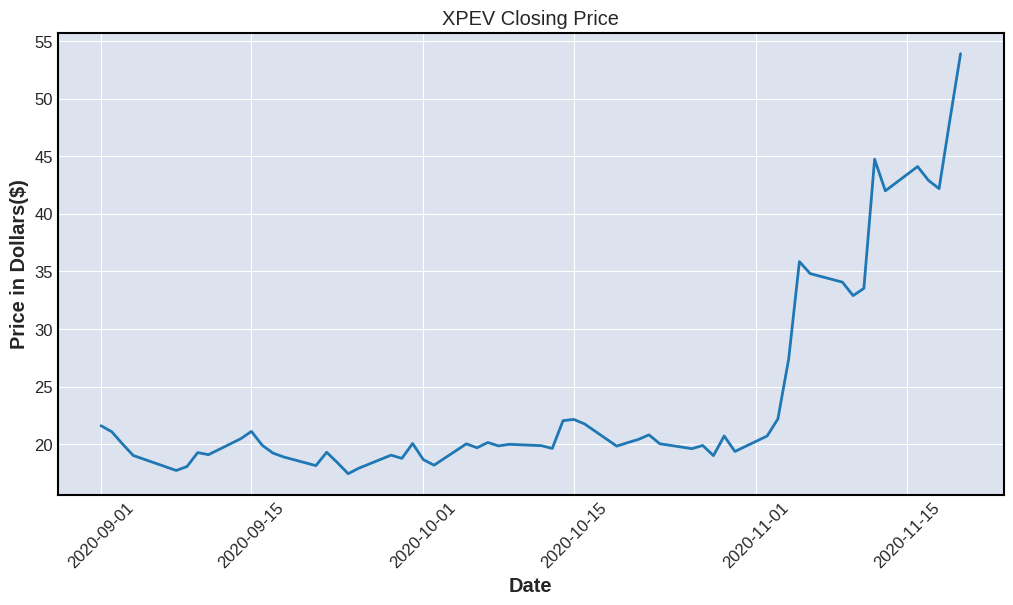

In [ ]:
# Plot the Stock Data!
plt.figure(figsize=(12.2,6))
plt.plot(df['Close'], label='Close')
plt.title(f'{tick} Closing Price')
plt.xlabel('Date')
plt.ylabel('Price in Dollars($)')
plt.xticks(rotation=45)

In [ ]:
#MACD & signal lines
sSpan,lSpan,mSpan = 12,26,9
shortMACD = df.Close.ewm(span=sSpan,adjust=False).mean()
longMACD = df.Close.ewm(span=lSpan,adjust=False).mean()
MACD = shortMACD - longMACD
sigLine = MACD.ewm(span=mSpan,adjust=False).mean()

(array([737669., 737683., 737699., 737713., 737730., 737744.]),
 <a list of 6 Text major ticklabel objects>)

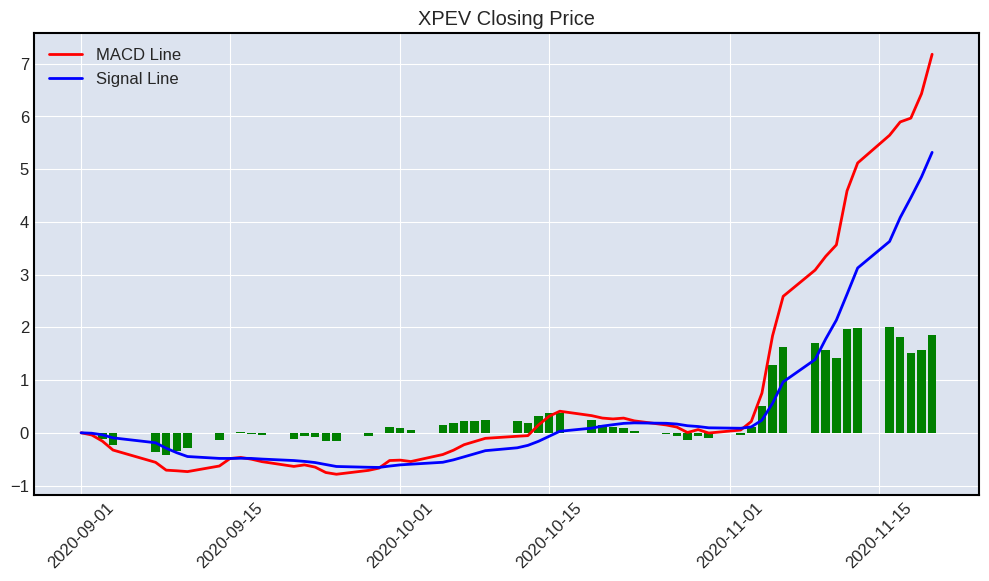

In [ ]:
# Plot the MACD & Signal Lines
plt.figure(figsize=(12.2,6))
plt.plot(df.index,MACD,label=('MACD Line'),color='red')
plt.plot(df.index,sigLine,label=('Signal Line'),color='blue')
x_pos = [i for i, _ in enumerate(histogram)]
#plt.bar(histoEXP, color='green')
plt.bar(histogram.index, histogram, color='green')
plt.title(f'{tick} Closing Price')
plt.legend(loc='upper left')
plt.xticks(rotation=45)

In [ ]:
histogram = MACD - sigLine
histoEXP = histogram*10

In [ ]:
x_pos = [i for i, _ in enumerate(histogram)]
x_pos

In [ ]:
# experimenting with mpl finance library to skip over weekend dates
# This may work to skip weekends or non-market days
# mpf.plot(data[-50:], no_xgaps = True)

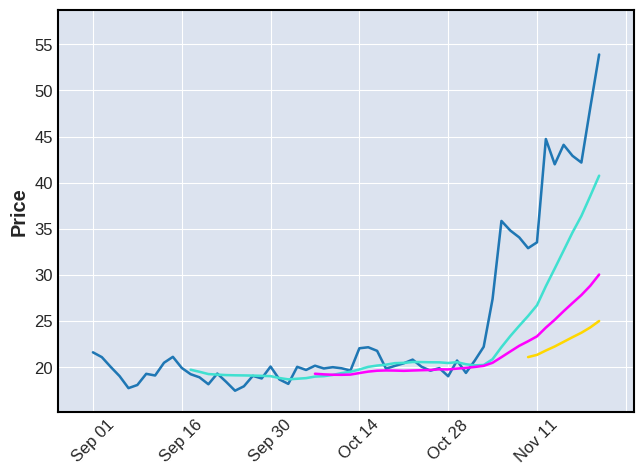

In [ ]:
# this is kind of awesome, instant candlestick charts!
mpf.plot(df, type='line', no_xgaps = True, mav=(12,26,50))

In [ ]:
MACDdf = MACD.to_frame()
fig = mpf.figure(figsize=(12.2,6))
mpf.plot(MACDdf)

#mpf.plot(df.index,sigLine,label=('Signal Line'),color='blue')
#mpf.bar(histogram.index, histogram, color='green')
#mpf.title(f'{tick} Closing Price')
#mpf.legend(loc='upper left')
#mpf.xticks(rotation=45)

In [ ]:
MACDplt = mpf.make_addplot(MACD, type='line', color='red')
sigPlot = mpf.make_addplot(sigLine, type='line', color='blue')
mpf.plot(df,type='candle',addplot=MACDplt, sigPlot, no_xgaps = True)

SyntaxError: ignored